In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import hashlib
import keras
import keras.backend as K

Using TensorFlow backend.


In [2]:
(data, _), (_, _) = keras.datasets.cifar10.load_data()
np.random.shuffle(data)
data = data[:40]
data = data/255
data = np.clip(np.array([cv2.resize(
    data_,
    dsize=(data.shape[1]*4,data.shape[2]*4),
    interpolation=cv2.INTER_LANCZOS4) for data_ in data]), 0, 1) - 0.5

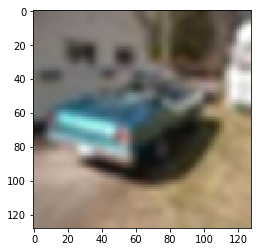

In [3]:
plt.imshow(data[np.random.randint(0,len(data))] + 0.5, cmap='gray')
plt.show()

In [4]:
proposed_keys = np.exp(np.random.rand(*data.shape) *2*np.pi*1j)
proposed_keys = np.reshape(proposed_keys, (data.shape[0],-1))

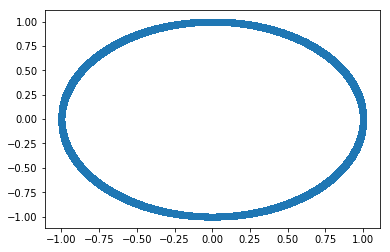

In [5]:
plt.scatter(np.real(proposed_keys), np.imag(proposed_keys))
plt.show()

In [35]:
X = X_input = keras.layers.Input(data.shape[1:])
X = keras.layers.Flatten()(X)
X = keras.layers.Dropout(0.5)(X)
X = keras.layers.GaussianNoise(0.2)(X)
X = keras.layers.BatchNormalization()(X)
X = keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform')(X)
X_real = keras.layers.Dense(proposed_keys.shape[-1], activation='tanh')(X)
X_imag = keras.layers.Dense(proposed_keys.shape[-1], activation='tanh')(X)
def bound(r, i, o):
    denorm = K.clip(K.sqrt(r*r + i*i), 1, None)
    return o/denorm
X_real = keras.layers.Lambda(lambda x: bound(*x), )([X_real,X_imag,X_real])
X_imag = keras.layers.Lambda(lambda x: bound(*x), )([X_real,X_imag,X_imag])
M = keras.Model(X_input, [X_real,X_imag])
M.compile('nadam', 'mse')
M.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
flatten_6 (Flatten)             (None, 49152)        0           input_6[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 49152)        0           flatten_6[0][0]                  
__________________________________________________________________________________________________
gaussian_noise_6 (GaussianNoise (None, 49152)        0           dropout_6[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [36]:
M.fit(data, [np.real(proposed_keys),np.imag(proposed_keys)], epochs=200, callbacks=[
    keras.callbacks.ReduceLROnPlateau('loss', patience=10, verbose=1)
])

Epoch 1/200
40/40 [==============================] - 1s 33ms/step - loss: 1.0438 - lambda_7_loss: 0.5220 - lambda_8_loss: 0.5217
Epoch 2/200
40/40 [==============================] - 0s 8ms/step - loss: 1.1440 - lambda_7_loss: 0.5720 - lambda_8_loss: 0.5719
Epoch 3/200
40/40 [==============================] - 0s 9ms/step - loss: 1.0702 - lambda_7_loss: 0.5353 - lambda_8_loss: 0.5349
Epoch 4/200
40/40 [==============================] - 0s 9ms/step - loss: 1.0350 - lambda_7_loss: 0.5176 - lambda_8_loss: 0.5174
Epoch 5/200
40/40 [==============================] - 0s 9ms/step - loss: 1.0094 - lambda_7_loss: 0.5049 - lambda_8_loss: 0.5044
Epoch 6/200
40/40 [==============================] - 0s 9ms/step - loss: 0.9662 - lambda_7_loss: 0.4832 - lambda_8_loss: 0.4830
Epoch 7/200
40/40 [==============================] - 0s 9ms/step - loss: 0.9207 - lambda_7_loss: 0.4606 - lambda_8_loss: 0.4601
Epoch 8/200
40/40 [==============================] - 0s 9ms/step - loss: 0.8875 - lambda_7_loss: 0.4440

40/40 [==============================] - 0s 9ms/step - loss: 0.1909 - lambda_7_loss: 0.0910 - lambda_8_loss: 0.0999
Epoch 65/200
40/40 [==============================] - 0s 9ms/step - loss: 0.2783 - lambda_7_loss: 0.1327 - lambda_8_loss: 0.1456
Epoch 66/200
40/40 [==============================] - 0s 9ms/step - loss: 0.2014 - lambda_7_loss: 0.0956 - lambda_8_loss: 0.1058
Epoch 67/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1909 - lambda_7_loss: 0.0905 - lambda_8_loss: 0.1004
Epoch 68/200
40/40 [==============================] - 0s 9ms/step - loss: 0.2039 - lambda_7_loss: 0.0965 - lambda_8_loss: 0.1074
Epoch 69/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1861 - lambda_7_loss: 0.0880 - lambda_8_loss: 0.0982
Epoch 70/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1911 - lambda_7_loss: 0.0902 - lambda_8_loss: 0.1009
Epoch 71/200
40/40 [==============================] - 0s 9ms/step - loss: 0.2299 - lambda_7_loss: 0.1085 - lam

40/40 [==============================] - 0s 9ms/step - loss: 0.1214 - lambda_7_loss: 0.0583 - lambda_8_loss: 0.0631
Epoch 127/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1221 - lambda_7_loss: 0.0588 - lambda_8_loss: 0.0633
Epoch 128/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1199 - lambda_7_loss: 0.0578 - lambda_8_loss: 0.0621
Epoch 129/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1199 - lambda_7_loss: 0.0578 - lambda_8_loss: 0.0621
Epoch 130/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1182 - lambda_7_loss: 0.0570 - lambda_8_loss: 0.0612
Epoch 131/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1217 - lambda_7_loss: 0.0585 - lambda_8_loss: 0.0631
Epoch 132/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1212 - lambda_7_loss: 0.0583 - lambda_8_loss: 0.0629
Epoch 133/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1138 - lambda_7_loss: 0.055

40/40 [==============================] - 0s 9ms/step - loss: 0.1117 - lambda_7_loss: 0.0539 - lambda_8_loss: 0.0578

Epoch 00186: ReduceLROnPlateau reducing learning rate to 2.000000165480742e-09.
Epoch 187/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1121 - lambda_7_loss: 0.0542 - lambda_8_loss: 0.0580
Epoch 188/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1197 - lambda_7_loss: 0.0577 - lambda_8_loss: 0.0619
Epoch 189/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1115 - lambda_7_loss: 0.0539 - lambda_8_loss: 0.0576
Epoch 190/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1134 - lambda_7_loss: 0.0548 - lambda_8_loss: 0.0586
Epoch 191/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1147 - lambda_7_loss: 0.0554 - lambda_8_loss: 0.0593
Epoch 192/200
40/40 [==============================] - 0s 9ms/step - loss: 0.1147 - lambda_7_loss: 0.0554 - lambda_8_loss: 0.0593
Epoch 193/200
40/40 [==

In [37]:
keys = M.predict(np.concatenate([data[-1:],data[:-1]]))
keys = keys[0] + keys[1]*1j

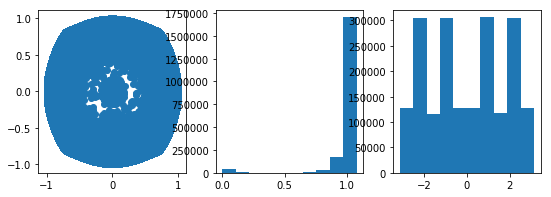

In [38]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.scatter(np.real(keys), np.imag(keys))
plt.subplot(1,3,2)
plt.hist(np.reshape(np.abs(keys), (-1,)))
plt.subplot(1,3,3)
plt.hist(np.reshape(np.angle(keys), (-1,)))
plt.show()

In [39]:
ps = []
for i in range(40):
    p = np.arange(data.shape[1]*data.shape[2]*data.shape[3])
    np.random.shuffle(p)
    ps.append(p)
ps = np.array(ps)

In [40]:
cs = np.array([
    np.sum(np.reshape(keys[:,p],data.shape) * data, axis=0)
    for p in ps])

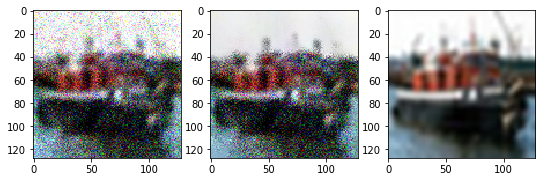

In [41]:
i = np.random.randint(0,len(data))
y = np.array([
    np.conj(np.reshape(keys[i,p],data.shape[1:]))*c
    for p,c in zip(ps,cs)])
y = np.real(y)
y = np.mean(y + 0.5, axis=0)
y = np.clip(y , 0, 1)
yd = np.float32(cv2.fastNlMeansDenoisingColored(np.uint8(np.round(y*255)),None,10,10,7,21))/255
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(y, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(yd, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(data[i] + 0.5, cmap='gray')
plt.show()

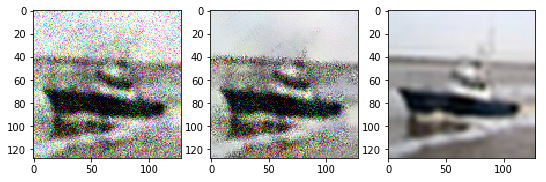

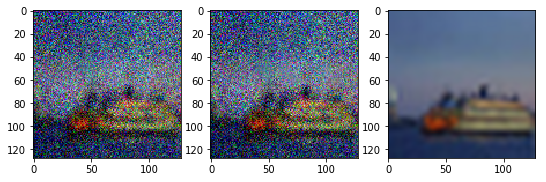

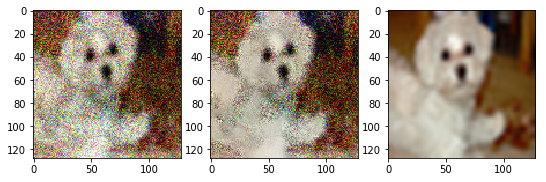

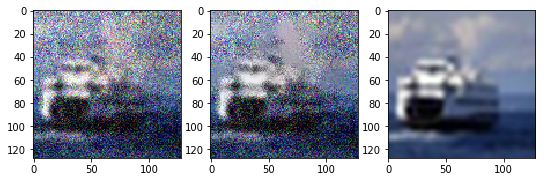

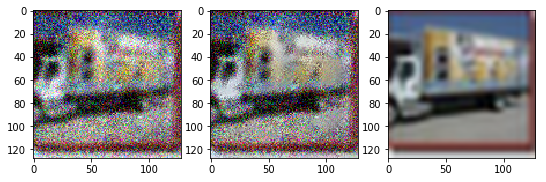

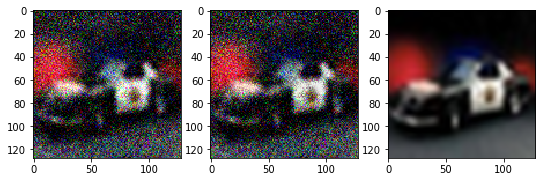

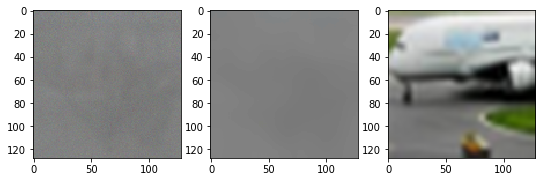

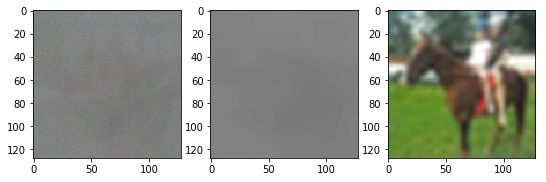

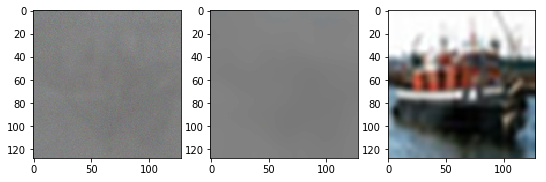

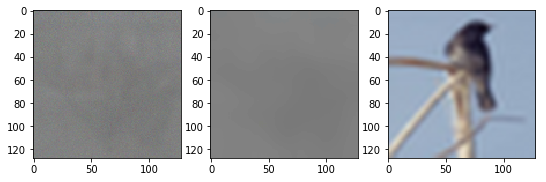

In [44]:
s = np.random.randint(0,data.shape[0])
k = keys[s]
for i in range(min(data.shape[0],10)):
    y = np.array([
        np.conj(np.reshape(k[p],data.shape[1:]))*c
        for p,c in zip(ps,cs)])
    y = np.real(y)
    y = np.mean(y + 0.5, axis=0)
    y = np.clip(y , 0, 1)
    yd = np.float32(cv2.fastNlMeansDenoisingColored(np.uint8(np.round(y*255)),None,10,10,7,21))/255
    k = M.predict(y[np.newaxis,:,:,:] - 0.5)
    k = k[0][0] + k[1][0]*1j
    plt.figure(figsize=(9,3))
    plt.subplot(1,3,1)
    plt.imshow(y, cmap='gray')
    plt.subplot(1,3,2)
    plt.imshow(yd, cmap='gray')
    plt.subplot(1,3,3)
    plt.imshow(data[(s+i)%data.shape[0]] + 0.5, cmap='gray')
    plt.show()